In [10]:
import numpy as np
from keras import backend as K
from sklearn.metrics import classification_report, confusion_matrix
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


In [11]:
batch_size = 32
img_height = 180
img_width = 180

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/gdrive/MyDrive/Datase",
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1001 files belonging to 50 classes.
Using 801 files for training.


In [13]:

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  "/content/gdrive/MyDrive/Datase",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1001 files belonging to 50 classes.
Using 200 files for validation.


In [14]:
target_names = train_ds.class_names
print(target_names)
num= len(target_names)
print(num)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '6', '7', '8', '9']
50


(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)
(180, 180, 3)


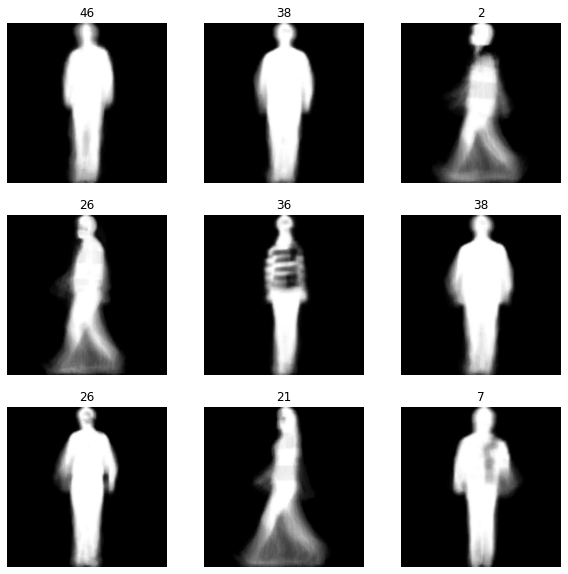

In [15]:
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    print(images[i].shape)
    plt.title(target_names[labels[i]])
    plt.axis("off")

In [16]:
from tensorflow.keras import layers
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [19]:
model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num)
])

In [20]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [21]:
history= model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
26/26 [==============================] - 152s 6s/step - loss: 3.9509 - accuracy: 0.0188 - val_loss: 3.9150 - val_accuracy: 0.0100
Epoch 2/10
26/26 [==============================] - 3s 90ms/step - loss: 3.9046 - accuracy: 0.0405 - val_loss: 3.9142 - val_accuracy: 0.0150
Epoch 3/10
26/26 [==============================] - 3s 86ms/step - loss: 3.8833 - accuracy: 0.0286 - val_loss: 3.8697 - val_accuracy: 0.0150
Epoch 4/10
26/26 [==============================] - 3s 85ms/step - loss: 3.6055 - accuracy: 0.0722 - val_loss: 3.1277 - val_accuracy: 0.1450
Epoch 5/10
26/26 [==============================] - 3s 85ms/step - loss: 2.6318 - accuracy: 0.2789 - val_loss: 2.3602 - val_accuracy: 0.4150
Epoch 6/10
26/26 [==============================] - 3s 85ms/step - loss: 1.6800 - accuracy: 0.5491 - val_loss: 1.5032 - val_accuracy: 0.5900
Epoch 7/10
26/26 [==============================] - 3s 85ms/step - loss: 0.6734 - accuracy: 0.7945 - val_loss: 0.9004 - val_accuracy: 0.7550
Epoch 8/10
26

In [22]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


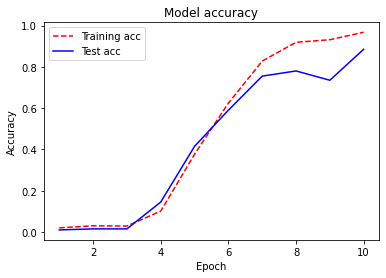

In [23]:
training_accuracy= history.history['accuracy']
test_accuracy= history.history['val_accuracy']
epoch_count = range(1, len(training_accuracy) + 1)
plt.plot(epoch_count,training_accuracy,'r--')
plt.plot(epoch_count,test_accuracy,'b-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training acc', 'Test acc'])
plt.show()


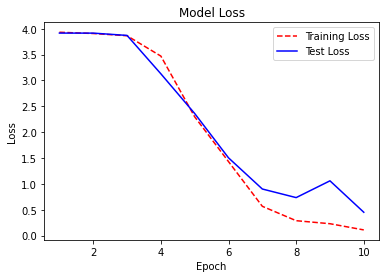

In [24]:
training_loss=  history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.title('Model Loss')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Different CNN

In [31]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(img_height, img_width, 3), padding='same',activation='relu'))
model1.add(Conv2D(32, (3, 3), activation='relu')) 
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))


model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))

model1.add((Dense(num, activation= 'softmax')))




In [32]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 178, 178, 32)      9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 89, 89, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 87, 87, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 43, 43, 64)       

In [33]:
model1.compile(
  optimizer='rmsprop',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [34]:
history= model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
26/26 [==============================] - 5s 135ms/step - loss: 114.3401 - accuracy: 0.0383 - val_loss: 3.8564 - val_accuracy: 0.0850
Epoch 2/10
26/26 [==============================] - 4s 127ms/step - loss: 3.6562 - accuracy: 0.1451 - val_loss: 3.0874 - val_accuracy: 0.2900
Epoch 3/10
26/26 [==============================] - 4s 127ms/step - loss: 2.1847 - accuracy: 0.4808 - val_loss: 2.5470 - val_accuracy: 0.4650
Epoch 4/10
26/26 [==============================] - 4s 127ms/step - loss: 0.8132 - accuracy: 0.7781 - val_loss: 2.8872 - val_accuracy: 0.5100
Epoch 5/10
26/26 [==============================] - 4s 132ms/step - loss: 0.5673 - accuracy: 0.8825 - val_loss: 0.9101 - val_accuracy: 0.8200
Epoch 6/10
26/26 [==============================] - 4s 127ms/step - loss: 0.2616 - accuracy: 0.9296 - val_loss: 0.6982 - val_accuracy: 0.8700
Epoch 7/10
26/26 [==============================] - 4s 128ms/step - loss: 0.1387 - accuracy: 0.9667 - val_loss: 0.8946 - val_accuracy: 0.8150
Epoc

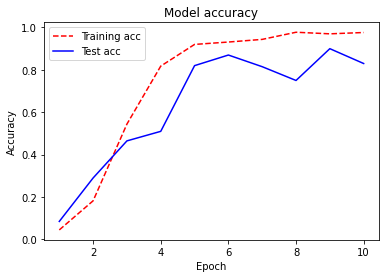

In [35]:
training_accuracy= history.history['accuracy']
test_accuracy= history.history['val_accuracy']
epoch_count = range(1, len(training_accuracy) + 1)
plt.plot(epoch_count,training_accuracy,'r--')
plt.plot(epoch_count,test_accuracy,'b-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training acc', 'Test acc'])
plt.show()



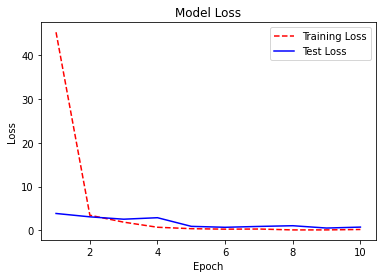

In [36]:
training_loss=  history.history['loss']
test_loss = history.history['val_loss']
epoch_count = range(1, len(training_loss) + 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.title('Model Loss')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()